### PROYECTO: AGRICULTURA Y SEGURIDAD ALIMENTARIA EN EL PERÚ

* Este proyecto tiene como objetivo analizar los principales indicadores de la agricultura y la seguridad alimentaria en el Perú; así como la relación y el impacto de la agricultura en la seguridad alimentaria.Todo ello a fin de generar evidencia que apoye al Ministerio de Desarrollo Agrario y Riego, a tomar mejores decisiones en la formulación de Políticas públicas orientadas al desarrollo sostenible del sector agrícola y a garantizar la seguridad alimentaria en el Perú.

* Preguntas de investigación:
     - ¿Qué reflejan las estadísticas descriptivas de los datos sobre la agricultura en el Perú?
     - ¿Qué reflejan las estadísticas descriptivas de los datos sobre la seguridad alimentaria en el Perú?
     - ¿De qué manera se relaciona la agricultura con la seguridad alimentaria en el Perú?
     - ¿Cuál es el impacto de la agricultura en la seguridad alimentaria del Perú durante los años 2001-2019?

In [ ]:
# EXTRACCIÓN DE DATOS USANDO API - BANCO MUNDIAL

In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wbgapi as wb

In [3]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2021-10-28
3,Worldwide Governance Indicators,WGI,3,2021-09-27
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2021-10-10
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2021-04-02
14,Gender Statistics,GDS,3,2021-09-27
15,Global Economic Monitor,GEM,3,2020-07-27


### BASE DE DATOS DE LA AGRICULTURA

* Según la Organización de las Naciones Unidas para la Alimentación y la Agricultura - FAO(2011), la agricultura es una actividad que se ocupa de la producción del cultivo del suelo, el desarrollo y recogida de las cosechas, así como también de la explotación de bosques y selvas (silvicultura), la cría y desarrollo de ganado. Es por ello que para este proyecto se ha considerado los principales indicadores de la agricultura extraídos a través del API del Banco Mundial, tales como: Tierras agrícolas (% del área de tierra), Tierras cultivables(% del área de tierra), Agricultura, valor agregado (% del PIB), Empleos en agricultura (% del total de empleos), Índice de producción de alimentos (2004-2006 = 100), Índice de producción animal (2004-2006 = 100), Importaciones de alimentos (% de importaciones de mercaderías), Exportaciones de alimentos (% de exportaciones de mercaderías).

In [4]:
# PIB per cápita (US$ a precios actuales)
PBI=wb.data.DataFrame('NY.GDP.PCAP.CD', ['PER'], time = range(1990,2020), labels = True)
PBI

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,1196.586858,1524.770536,1566.011279,1488.032995,1881.737355,2194.017247,2232.075816,2306.438527,2163.119357,...,5082.353706,5869.323882,6528.971775,6756.752996,6672.877373,6229.100674,6204.996457,6710.507602,6957.793411,7027.612207


In [5]:
PBI.drop(['Country'], axis=1, inplace=True)
PBI

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,1196.586858,1524.770536,1566.011279,1488.032995,1881.737355,2194.017247,2232.075816,2306.438527,2163.119357,1924.486419,...,5082.353706,5869.323882,6528.971775,6756.752996,6672.877373,6229.100674,6204.996457,6710.507602,6957.793411,7027.612207


In [6]:
PBI.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
PBI

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,1196.586858,1524.770536,1566.011279,1488.032995,1881.737355,2194.017247,2232.075816,2306.438527,2163.119357,1924.486419,...,5082.353706,5869.323882,6528.971775,6756.752996,6672.877373,6229.100674,6204.996457,6710.507602,6957.793411,7027.612207


In [7]:
data0=PBI.transpose()
data0.head()

economy,PER
1990,1196.586858
1991,1524.770536
1992,1566.011279
1993,1488.032995
1994,1881.737355


In [8]:
data0.rename(columns={'PER':'PBI'}, inplace=True)
data0.head()

economy,PBI
1990,1196.586858
1991,1524.770536
1992,1566.011279
1993,1488.032995
1994,1881.737355


In [9]:
data0['index'] = data0.index
data0.head()

economy,PBI,index
1990,1196.586858,1990
1991,1524.770536,1991
1992,1566.011279,1992
1993,1488.032995,1993
1994,1881.737355,1994


In [10]:
data0.rename(columns={'index':'Año'}, inplace=True)
data0.head()

economy,PBI,Año
1990,1196.586858,1990
1991,1524.770536,1991
1992,1566.011279,1992
1993,1488.032995,1993
1994,1881.737355,1994


In [11]:
# Tierras agrícolas (% del área de tierra)
tierrasagricolas=wb.data.DataFrame('AG.LND.AGRI.ZS', ['PER'], time = range(1990,2020), labels = True)
tierrasagricolas

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,17.059375,17.10625,17.153125,17.160937,16.904609,17.100781,17.282812,17.449219,17.658594,...,18.767969,18.83125,19.009453,19.042188,18.577344,18.229688,18.505469,18.489844,18.444297,NaN


In [12]:
tierrasagricolas.drop(['Country'], axis=1, inplace=True)
tierrasagricolas

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,17.059375,17.10625,17.153125,17.160937,16.904609,17.100781,17.282812,17.449219,17.658594,17.832812,...,18.767969,18.83125,19.009453,19.042188,18.577344,18.229688,18.505469,18.489844,18.444297,NaN


In [13]:
tierrasagricolas.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
tierrasagricolas

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,17.059375,17.10625,17.153125,17.160937,16.904609,17.100781,17.282812,17.449219,17.658594,17.832812,...,18.767969,18.83125,19.009453,19.042188,18.577344,18.229688,18.505469,18.489844,18.444297,NaN


In [14]:
data1=tierrasagricolas.transpose()
data1.head()

economy,PER
1990,17.059375
1991,17.106250
1992,17.153125
1993,17.160937
1994,16.904609


In [15]:
data1.rename(columns={'PER':'Tierras_agrícolas'}, inplace=True)
data1.head()

economy,Tierras_agrícolas
1990,17.059375
1991,17.106250
1992,17.153125
1993,17.160937
1994,16.904609


In [16]:
data1['index'] = data1.index
data1.head()

economy,Tierras_agrícolas,index
1990,17.059375,1990
1991,17.106250,1991
1992,17.153125,1992
1993,17.160937,1993
1994,16.904609,1994


In [17]:
data1.rename(columns={'index':'Año'}, inplace=True)
data1.head()

economy,Tierras_agrícolas,Año
1990,17.059375,1990
1991,17.106250,1991
1992,17.153125,1992
1993,17.160937,1993
1994,16.904609,1994


In [18]:
# Tierras cultivables(% del área de tierra)
tierrascultivables=wb.data.DataFrame('AG.LND.ARBL.ZS', ['PER'], time = range(1990,2020), labels = True)
tierrascultivables

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,2.734375,2.773438,2.8125,2.8125,2.814062,2.921875,3.015625,3.09375,3.214844,...,3.191406,3.148438,3.246875,3.277344,2.8125,2.464844,2.740625,2.725,2.679453,NaN


In [19]:
tierrascultivables.drop(['Country'], axis=1, inplace=True)
tierrascultivables

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,2.734375,2.773438,2.8125,2.8125,2.814062,2.921875,3.015625,3.09375,3.214844,3.300781,...,3.191406,3.148438,3.246875,3.277344,2.8125,2.464844,2.740625,2.725,2.679453,NaN


In [20]:
tierrascultivables.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
tierrascultivables

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,2.734375,2.773438,2.8125,2.8125,2.814062,2.921875,3.015625,3.09375,3.214844,3.300781,...,3.191406,3.148438,3.246875,3.277344,2.8125,2.464844,2.740625,2.725,2.679453,NaN


In [21]:
data2=tierrascultivables.transpose()
data2.head()

economy,PER
1990,2.734375
1991,2.773438
1992,2.812500
1993,2.812500
1994,2.814062


In [22]:
data2.rename(columns={'PER':'Tierras_cultivables'}, inplace=True)
data2.head()

economy,Tierras_cultivables
1990,2.734375
1991,2.773438
1992,2.812500
1993,2.812500
1994,2.814062


In [23]:
data2['index'] = data2.index
data2.head()

economy,Tierras_cultivables,index
1990,2.734375,1990
1991,2.773438,1991
1992,2.812500,1992
1993,2.812500,1993
1994,2.814062,1994


In [24]:
data2.rename(columns={'index':'Año'}, inplace=True)
data2.head()

economy,Tierras_cultivables,Año
1990,2.734375,1990
1991,2.773438,1991
1992,2.812500,1992
1993,2.812500,1993
1994,2.814062,1994


In [25]:
# Agricultura, valor agregado (% del PIB)
pbiagricultura=wb.data.DataFrame('NV.AGR.TOTL.ZS', ['PER'], time = range(1990,2020), labels = True)
pbiagricultura

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,NaN,7.862396,7.81805,8.29164,8.415585,8.038216,8.504048,8.048159,8.378335,...,6.827997,7.10011,6.725234,6.66831,6.804247,7.045644,6.935035,6.77976,6.863983,6.74618


In [26]:
pbiagricultura.drop(['Country'], axis=1, inplace=True)
pbiagricultura

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,7.862396,7.81805,8.29164,8.415585,8.038216,8.504048,8.048159,8.378335,8.264502,...,6.827997,7.10011,6.725234,6.66831,6.804247,7.045644,6.935035,6.77976,6.863983,6.74618


In [27]:
pbiagricultura.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
pbiagricultura

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,7.862396,7.81805,8.29164,8.415585,8.038216,8.504048,8.048159,8.378335,8.264502,...,6.827997,7.10011,6.725234,6.66831,6.804247,7.045644,6.935035,6.77976,6.863983,6.74618


In [28]:
data3=pbiagricultura.transpose()
data3.head()

economy,PER
1990,NaN
1991,7.862396
1992,7.818050
1993,8.291640
1994,8.415585


In [29]:
data3.rename(columns={'PER':'PBI_agricultura'}, inplace=True)
data3.head()

economy,PBI_agricultura
1990,NaN
1991,7.862396
1992,7.818050
1993,8.291640
1994,8.415585


In [30]:
data3['index'] = data3.index
data3.head()

economy,PBI_agricultura,index
1990,NaN,1990
1991,7.862396,1991
1992,7.818050,1992
1993,8.291640,1993
1994,8.415585,1994


In [31]:
data3.rename(columns={'index':'Año'}, inplace=True)
data3.head()

economy,PBI_agricultura,Año
1990,NaN,1990
1991,7.862396,1991
1992,7.818050,1992
1993,8.291640,1993
1994,8.415585,1994


In [32]:
# Empleos en agricultura (% del total de empleos)
empleototal=wb.data.DataFrame('SL.AGR.EMPL.ZS', ['PER'], time = range(1990,2020), labels = True)
empleototal

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,NaN,37.099998,37.119999,36.849998,36.200001,35.75,35.529999,35.110001,35.080002,...,27.73,28.280001,27.440001,27.41,28.030001,28.26,28.379999,27.690001,27.790001,27.370001


In [33]:
empleototal.drop(['Country'], axis=1, inplace=True)
empleototal

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,37.099998,37.119999,36.849998,36.200001,35.75,35.529999,35.110001,35.080002,35.07,...,27.73,28.280001,27.440001,27.41,28.030001,28.26,28.379999,27.690001,27.790001,27.370001


In [34]:
empleototal.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
empleototal

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,37.099998,37.119999,36.849998,36.200001,35.75,35.529999,35.110001,35.080002,35.07,...,27.73,28.280001,27.440001,27.41,28.030001,28.26,28.379999,27.690001,27.790001,27.370001


In [35]:
data4=empleototal.transpose()
data4.head()

economy,PER
1990,NaN
1991,37.099998
1992,37.119999
1993,36.849998
1994,36.200001


In [36]:
data4.rename(columns={'PER':'Empleo_total'}, inplace=True)
data4.head()

economy,Empleo_total
1990,NaN
1991,37.099998
1992,37.119999
1993,36.849998
1994,36.200001


In [37]:
data4['index'] = data4.index
data4.head()

economy,Empleo_total,index
1990,NaN,1990
1991,37.099998,1991
1992,37.119999,1992
1993,36.849998,1993
1994,36.200001,1994


In [38]:
data4.rename(columns={'index':'Año'}, inplace=True)
data4.head()

economy,Empleo_total,Año
1990,NaN,1990
1991,37.099998,1991
1992,37.119999,1992
1993,36.849998,1993
1994,36.200001,1994


In [39]:
# Empleados en agricultura, mujeres (% del empleo femenino)
empleomujeres=wb.data.DataFrame('SL.AGR.EMPL.FE.ZS', ['PER'], time = range(1990,2020), labels = True)
empleomujeres

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,NaN,33.720001,33.700001,33.389999,32.810001,32.57,32.330002,32.09,31.879999,...,26.610001,26.66,26.15,26.360001,26.85,27.07,27.379999,26.07,26.139999,26.34


In [40]:
empleomujeres.drop(['Country'], axis=1, inplace=True)
empleomujeres

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,33.720001,33.700001,33.389999,32.810001,32.57,32.330002,32.09,31.879999,31.889999,...,26.610001,26.66,26.15,26.360001,26.85,27.07,27.379999,26.07,26.139999,26.34


In [41]:
empleomujeres.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
empleomujeres

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,33.720001,33.700001,33.389999,32.810001,32.57,32.330002,32.09,31.879999,31.889999,...,26.610001,26.66,26.15,26.360001,26.85,27.07,27.379999,26.07,26.139999,26.34


In [42]:
data5=empleomujeres.transpose()
data5.head()

economy,PER
1990,NaN
1991,33.720001
1992,33.700001
1993,33.389999
1994,32.810001


In [43]:
data5.rename(columns={'PER':'Empleo_mujeres'}, inplace=True)
data5.head()

economy,Empleo_mujeres
1990,NaN
1991,33.720001
1992,33.700001
1993,33.389999
1994,32.810001


In [44]:
data5['index'] = data5.index
data5.head()

economy,Empleo_mujeres,index
1990,NaN,1990
1991,33.720001,1991
1992,33.700001,1992
1993,33.389999,1993
1994,32.810001,1994


In [45]:
data5.rename(columns={'index':'Año'}, inplace=True)
data5.head()

economy,Empleo_mujeres,Año
1990,NaN,1990
1991,33.720001,1991
1992,33.700001,1992
1993,33.389999,1993
1994,32.810001,1994


In [46]:
# Empleados en agricultura, hombres (% del empleo masculino)
empleohombres=wb.data.DataFrame('SL.AGR.EMPL.MA.ZS', ['PER'], time = range(1990,2020), labels = True)
empleohombres

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,NaN,39.16,39.220001,39.0,38.310001,37.860001,37.75,37.290001,37.369999,...,28.68,29.65,28.530001,28.309999,29.040001,29.26,29.219999,29.059999,29.17,28.25


In [47]:
empleohombres.drop(['Country'], axis=1, inplace=True)
empleohombres

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,39.16,39.220001,39.0,38.310001,37.860001,37.75,37.290001,37.369999,37.439999,...,28.68,29.65,28.530001,28.309999,29.040001,29.26,29.219999,29.059999,29.17,28.25


In [48]:
empleohombres.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
empleohombres

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,39.16,39.220001,39.0,38.310001,37.860001,37.75,37.290001,37.369999,37.439999,...,28.68,29.65,28.530001,28.309999,29.040001,29.26,29.219999,29.059999,29.17,28.25


In [49]:
data6=empleohombres.transpose()
data6.head()

economy,PER
1990,NaN
1991,39.160000
1992,39.220001
1993,39.000000
1994,38.310001


In [50]:
data6.rename(columns={'PER':'Empleo_hombres'}, inplace=True)
data6.head()

economy,Empleo_hombres
1990,NaN
1991,39.160000
1992,39.220001
1993,39.000000
1994,38.310001


In [51]:
data6['index'] = data6.index
data6.head()

economy,Empleo_hombres,index
1990,NaN,1990
1991,39.160000,1991
1992,39.220001,1992
1993,39.000000,1993
1994,38.310001,1994


In [52]:
data6.rename(columns={'index':'Año'}, inplace=True)
data6.head()

economy,Empleo_hombres,Año
1990,NaN,1990
1991,39.160000,1991
1992,39.220001,1992
1993,39.000000,1993
1994,38.310001,1994


In [53]:
# Índice de producción de alimentos (2004-2006 = 100)
indicealimentos=wb.data.DataFrame('AG.PRD.FOOD.XD', ['PER'], time = range(1990,2020), labels = True)
indicealimentos

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,31.61,33.1,31.22,33.79,37.56,40.3,43.64,47.18,47.43,...,83.53,85.8,91.48,95.36,98.74,99.64,101.62,103.31,111.05,NaN


In [54]:
indicealimentos.drop(['Country'], axis=1, inplace=True)
indicealimentos

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,31.61,33.1,31.22,33.79,37.56,40.3,43.64,47.18,47.43,53.16,...,83.53,85.8,91.48,95.36,98.74,99.64,101.62,103.31,111.05,NaN


In [55]:
indicealimentos.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
indicealimentos

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,31.61,33.1,31.22,33.79,37.56,40.3,43.64,47.18,47.43,53.16,...,83.53,85.8,91.48,95.36,98.74,99.64,101.62,103.31,111.05,NaN


In [56]:
data7=indicealimentos.transpose()
data7.head()

economy,PER
1990,31.61
1991,33.10
1992,31.22
1993,33.79
1994,37.56


In [57]:
data7.rename(columns={'PER':'Indice_alimentos'}, inplace=True)
data7.head()

economy,Indice_alimentos
1990,31.61
1991,33.10
1992,31.22
1993,33.79
1994,37.56


In [58]:
data7['index'] = data7.index
data7.head()

economy,Indice_alimentos,index
1990,31.61,1990
1991,33.10,1991
1992,31.22,1992
1993,33.79,1993
1994,37.56,1994


In [59]:
data7.rename(columns={'index':'Año'}, inplace=True)
data7.head()

economy,Indice_alimentos,Año
1990,31.61,1990
1991,33.10,1991
1992,31.22,1992
1993,33.79,1993
1994,37.56,1994


In [61]:
indiceanimal.drop(['Country'], axis=1, inplace=True)
indiceanimal

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,34.29,35.39,36.39,35.52,35.92,38.12,40.41,44.19,45.14,48.46,...,81.07,86.43,91.34,94.55,97.67,99.38,102.95,105.7,111.34,NaN


In [62]:
# Índice de producción animal (2004-2006 = 100)
indiceanimal=wb.data.DataFrame('AG.PRD.LVSK.XD', ['PER'], time = range(1990,2020), labels = True)
indiceanimal

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,34.29,35.39,36.39,35.52,35.92,38.12,40.41,44.19,45.14,...,81.07,86.43,91.34,94.55,97.67,99.38,102.95,105.7,111.34,NaN


In [63]:
indiceanimal.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
indiceanimal

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,34.29,35.39,36.39,35.52,35.92,38.12,40.41,44.19,45.14,...,81.07,86.43,91.34,94.55,97.67,99.38,102.95,105.7,111.34,NaN


In [64]:
data8=indiceanimal.transpose()
data8.head()

economy,PER
Country,Peru
1990,34.29
1991,35.39
1992,36.39
1993,35.52


In [65]:
data8.rename(columns={'PER':'Indice_produccion_animal'}, inplace=True)
data8.head()

economy,Indice_produccion_animal
Country,Peru
1990,34.29
1991,35.39
1992,36.39
1993,35.52


In [66]:
data8['index'] = data8.index
data8.head()

economy,Indice_produccion_animal,index
Country,Peru,Country
1990,34.29,1990
1991,35.39,1991
1992,36.39,1992
1993,35.52,1993


In [67]:
data8.rename(columns={'index':'Año'}, inplace=True)
data8.head()

economy,Indice_produccion_animal,Año
Country,Peru,Country
1990,34.29,1990
1991,35.39,1991
1992,36.39,1992
1993,35.52,1993


In [68]:
# Índice de cosecha (2004-2006 = 100)
indicecosecha=wb.data.DataFrame('AG.PRD.CROP.XD', ['PER'], time = range(1990,2020), labels = True)
indicecosecha

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,30.49,32.13,28.81,33.15,38.92,41.9,46.02,50.01,50.04,...,86.25,88.13,93.68,96.28,98.82,99.81,101.36,103.6,112.75,NaN


In [69]:
indicecosecha.drop(['Country'], axis=1, inplace=True)
indicecosecha

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,30.49,32.13,28.81,33.15,38.92,41.9,46.02,50.01,50.04,57.31,...,86.25,88.13,93.68,96.28,98.82,99.81,101.36,103.6,112.75,NaN


In [70]:
indicecosecha.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
indicecosecha

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,30.49,32.13,28.81,33.15,38.92,41.9,46.02,50.01,50.04,57.31,...,86.25,88.13,93.68,96.28,98.82,99.81,101.36,103.6,112.75,NaN


In [71]:
data9=indicecosecha.transpose()
data9.head()

economy,PER
1990,30.49
1991,32.13
1992,28.81
1993,33.15
1994,38.92


In [72]:
data9.rename(columns={'PER':'Indice_cosecha'}, inplace=True)
data9.head()

economy,Indice_cosecha
1990,30.49
1991,32.13
1992,28.81
1993,33.15
1994,38.92


In [73]:
data9['index'] = data9.index
data9.head()

economy,Indice_cosecha,index
1990,30.49,1990
1991,32.13,1991
1992,28.81,1992
1993,33.15,1993
1994,38.92,1994


In [74]:
data9.rename(columns={'index':'Año'}, inplace=True)
data9.head()

economy,Indice_cosecha,Año
1990,30.49,1990
1991,32.13,1991
1992,28.81,1992
1993,33.15,1993
1994,38.92,1994


In [75]:
# Producción de cereales (toneladas métricas)
produccioncereales=wb.data.DataFrame('AG.PRD.CREL.MT', ['PER'], time = range(1990,2020), labels = True)
produccioncereales

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,1778458.0,1729083.0,1521728.0,2013066.0,2405339.0,2132281.0,2541198.0,2593234.0,2845066.0,...,4868327.0,4616641.0,5223285.0,5249332.0,5009147.0,5469508.0,5179354.0,5140701.0,5644208.0,NaN


In [76]:
produccioncereales.drop(['Country'], axis=1, inplace=True)
produccioncereales

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,1778458.0,1729083.0,1521728.0,2013066.0,2405339.0,2132281.0,2541198.0,2593234.0,2845066.0,3395445.0,...,4868327.0,4616641.0,5223285.0,5249332.0,5009147.0,5469508.0,5179354.0,5140701.0,5644208.0,NaN


In [77]:
produccioncereales.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
produccioncereales

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,1778458.0,1729083.0,1521728.0,2013066.0,2405339.0,2132281.0,2541198.0,2593234.0,2845066.0,3395445.0,...,4868327.0,4616641.0,5223285.0,5249332.0,5009147.0,5469508.0,5179354.0,5140701.0,5644208.0,NaN


In [78]:
data10=produccioncereales.transpose()
data10.head()

economy,PER
1990,1778458.0
1991,1729083.0
1992,1521728.0
1993,2013066.0
1994,2405339.0


In [79]:
data10.rename(columns={'PER':'Produccion_cereales'}, inplace=True)
data10.head()

economy,Produccion_cereales
1990,1778458.0
1991,1729083.0
1992,1521728.0
1993,2013066.0
1994,2405339.0


In [80]:
data10['index'] = data10.index
data10.head()

economy,Produccion_cereales,index
1990,1778458.0,1990
1991,1729083.0,1991
1992,1521728.0,1992
1993,2013066.0,1993
1994,2405339.0,1994


In [81]:
data10.rename(columns={'index':'Año'}, inplace=True)
data10.head()

economy,Produccion_cereales,Año
1990,1778458.0,1990
1991,1729083.0,1991
1992,1521728.0,1992
1993,2013066.0,1993
1994,2405339.0,1994


In [82]:
# Exportaciones de alimentos (% de exportaciones de mercaderías)
exportaciones=wb.data.DataFrame('TX.VAL.FOOD.ZS.UN', ['PER'], time = range(1990,2020), labels = True)
exportaciones

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,NaN,NaN,23.238506,28.64873,32.451985,28.810956,28.39317,31.513669,21.665266,...,15.545903,16.165375,15.716071,15.848215,20.119632,21.738729,20.84231,19.41642,20.217343,22.574839


In [83]:
exportaciones.drop(['Country'], axis=1, inplace=True)
exportaciones

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,NaN,23.238506,28.64873,32.451985,28.810956,28.39317,31.513669,21.665266,24.2736,...,15.545903,16.165375,15.716071,15.848215,20.119632,21.738729,20.84231,19.41642,20.217343,22.574839


In [84]:
exportaciones.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
exportaciones

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,NaN,23.238506,28.64873,32.451985,28.810956,28.39317,31.513669,21.665266,24.2736,...,15.545903,16.165375,15.716071,15.848215,20.119632,21.738729,20.84231,19.41642,20.217343,22.574839


In [85]:
data11=exportaciones.transpose()
data11.head()

economy,PER
1990,NaN
1991,NaN
1992,23.238506
1993,28.648730
1994,32.451985


In [86]:
data11.rename(columns={'PER':'Exportaciones'}, inplace=True)
data11.head()

economy,Exportaciones
1990,NaN
1991,NaN
1992,23.238506
1993,28.648730
1994,32.451985


In [87]:
data11['index'] = data11.index
data11.head()

economy,Exportaciones,index
1990,NaN,1990
1991,NaN,1991
1992,23.238506,1992
1993,28.648730,1993
1994,32.451985,1994


In [88]:
data11.rename(columns={'index':'Año'}, inplace=True)
data11.head()

economy,Exportaciones,Año
1990,NaN,1990
1991,NaN,1991
1992,23.238506,1992
1993,28.648730,1993
1994,32.451985,1994


In [89]:
# Importaciones de alimentos (% de importaciones de mercaderías)
importaciones=wb.data.DataFrame('TM.VAL.FOOD.ZS.UN', ['PER'], time = range(1990,2020), labels = True)
importaciones

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,NaN,NaN,21.86676,19.644634,17.626329,13.54897,16.614661,14.233467,16.304777,...,10.323755,10.176005,10.007923,9.849323,10.518868,11.202703,11.617932,12.12346,11.394179,11.387823


In [90]:
importaciones.drop(['Country'], axis=1, inplace=True)
importaciones

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,NaN,21.86676,19.644634,17.626329,13.54897,16.614661,14.233467,16.304777,14.674988,...,10.323755,10.176005,10.007923,9.849323,10.518868,11.202703,11.617932,12.12346,11.394179,11.387823


In [91]:
importaciones.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
importaciones

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,NaN,21.86676,19.644634,17.626329,13.54897,16.614661,14.233467,16.304777,14.674988,...,10.323755,10.176005,10.007923,9.849323,10.518868,11.202703,11.617932,12.12346,11.394179,11.387823


In [92]:
data12=importaciones.transpose()
data12.head()

economy,PER
1990,NaN
1991,NaN
1992,21.866760
1993,19.644634
1994,17.626329


In [93]:
data12.rename(columns={'PER':'Importaciones'}, inplace=True)
data12.head()

economy,Importaciones
1990,NaN
1991,NaN
1992,21.866760
1993,19.644634
1994,17.626329


In [94]:
data12['index'] = data12.index
data12.head()

economy,Importaciones,index
1990,NaN,1990
1991,NaN,1991
1992,21.866760,1992
1993,19.644634,1993
1994,17.626329,1994


In [95]:
data12.rename(columns={'index':'Año'}, inplace=True)
data12.head()

economy,Importaciones,Año
1990,NaN,1990
1991,NaN,1991
1992,21.866760,1992
1993,19.644634,1993
1994,17.626329,1994


In [ ]:
# UNIÓN DE LOS INDICADORES DE AGRICULTURA

In [97]:
import pandas as pd
datafinal1=pd.merge(data0,data1, how='inner', on=["Año"])
datafinal1.head()

economy,PBI,Año,Tierras_agrícolas
0,1196.586858,1990,17.059375
1,1524.770536,1991,17.106250
2,1566.011279,1992,17.153125
3,1488.032995,1993,17.160937
4,1881.737355,1994,16.904609


In [98]:
datafinal2=pd.merge(datafinal1,data2, how='inner', on=["Año"])
datafinal2.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables
0,1196.586858,1990,17.059375,2.734375
1,1524.770536,1991,17.106250,2.773438
2,1566.011279,1992,17.153125,2.812500
3,1488.032995,1993,17.160937,2.812500
4,1881.737355,1994,16.904609,2.814062


In [99]:
datafinal3=pd.merge(datafinal2,data3, how='inner', on=["Año"])
datafinal3.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura
0,1196.586858,1990,17.059375,2.734375,NaN
1,1524.770536,1991,17.106250,2.773438,7.862396
2,1566.011279,1992,17.153125,2.812500,7.818050
3,1488.032995,1993,17.160937,2.812500,8.291640
4,1881.737355,1994,16.904609,2.814062,8.415585


In [100]:
datafinal4=pd.merge(datafinal3,data4, how='inner', on=["Año"])
datafinal4.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total
0,1196.586858,1990,17.059375,2.734375,NaN,NaN
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001


In [101]:
datafinal5=pd.merge(datafinal4,data5, how='inner', on=["Año"])
datafinal5.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres
0,1196.586858,1990,17.059375,2.734375,NaN,NaN,NaN
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998,33.720001
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999,33.700001
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998,33.389999
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001,32.810001


In [102]:
datafinal6=pd.merge(datafinal5,data6, how='inner', on=["Año"])
datafinal6.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres
0,1196.586858,1990,17.059375,2.734375,NaN,NaN,NaN,NaN
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998,33.720001,39.160000
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999,33.700001,39.220001
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998,33.389999,39.000000
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001,32.810001,38.310001


In [103]:
datafinal7=pd.merge(datafinal6,data7, how='inner', on=["Año"])
datafinal7.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres,Indice_alimentos
0,1196.586858,1990,17.059375,2.734375,NaN,NaN,NaN,NaN,31.61
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998,33.720001,39.160000,33.10
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999,33.700001,39.220001,31.22
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998,33.389999,39.000000,33.79
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001,32.810001,38.310001,37.56


In [104]:
datafinal8=pd.merge(datafinal7,data8, how='inner', on=["Año"])
datafinal8.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres,Indice_alimentos,Indice_produccion_animal
0,1196.586858,1990,17.059375,2.734375,NaN,NaN,NaN,NaN,31.61,34.29
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998,33.720001,39.160000,33.10,35.39
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999,33.700001,39.220001,31.22,36.39
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998,33.389999,39.000000,33.79,35.52
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001,32.810001,38.310001,37.56,35.92


In [105]:
datafinal9=pd.merge(datafinal8,data9, how='inner', on=["Año"])
datafinal9.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres,Indice_alimentos,Indice_produccion_animal,Indice_cosecha
0,1196.586858,1990,17.059375,2.734375,NaN,NaN,NaN,NaN,31.61,34.29,30.49
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998,33.720001,39.160000,33.10,35.39,32.13
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999,33.700001,39.220001,31.22,36.39,28.81
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998,33.389999,39.000000,33.79,35.52,33.15
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001,32.810001,38.310001,37.56,35.92,38.92


In [106]:
datafinal10=pd.merge(datafinal9,data10, how='inner', on=["Año"])
datafinal10.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres,Indice_alimentos,Indice_produccion_animal,Indice_cosecha,Produccion_cereales
0,1196.586858,1990,17.059375,2.734375,NaN,NaN,NaN,NaN,31.61,34.29,30.49,1778458.0
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998,33.720001,39.160000,33.10,35.39,32.13,1729083.0
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999,33.700001,39.220001,31.22,36.39,28.81,1521728.0
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998,33.389999,39.000000,33.79,35.52,33.15,2013066.0
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001,32.810001,38.310001,37.56,35.92,38.92,2405339.0


In [107]:
datafinal11=pd.merge(datafinal9,data11, how='inner', on=["Año"])
datafinal11.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres,Indice_alimentos,Indice_produccion_animal,Indice_cosecha,Exportaciones
0,1196.586858,1990,17.059375,2.734375,NaN,NaN,NaN,NaN,31.61,34.29,30.49,NaN
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998,33.720001,39.160000,33.10,35.39,32.13,NaN
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999,33.700001,39.220001,31.22,36.39,28.81,23.238506
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998,33.389999,39.000000,33.79,35.52,33.15,28.648730
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001,32.810001,38.310001,37.56,35.92,38.92,32.451985


In [108]:
data_agricultura=pd.merge(datafinal11,data12, how='inner', on=["Año"])
data_agricultura.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres,Indice_alimentos,Indice_produccion_animal,Indice_cosecha,Exportaciones,Importaciones
0,1196.586858,1990,17.059375,2.734375,NaN,NaN,NaN,NaN,31.61,34.29,30.49,NaN,NaN
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998,33.720001,39.160000,33.10,35.39,32.13,NaN,NaN
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999,33.700001,39.220001,31.22,36.39,28.81,23.238506,21.866760
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998,33.389999,39.000000,33.79,35.52,33.15,28.648730,19.644634
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001,32.810001,38.310001,37.56,35.92,38.92,32.451985,17.626329


### LIMPIEZA DE DATOS

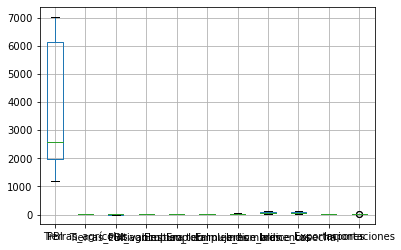

In [109]:
# Diagrama de caja y bigotes para ver si existen valores atípicos o outliers del dataset
import matplotlib.pyplot as plt
data_agricultura.boxplot(return_type="dict")
plt.show()

In [110]:
# Para ver si hay valores atípicos o outliers en la tabla analizada se calcula los estadísticos para el boxplot de la data analizada
data_agricultura.describe()

economy,PBI,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres,Indice_alimentos,Indice_cosecha,Exportaciones,Importaciones
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,28.000000,28.000000
mean,3696.845911,18.012734,3.005488,7.399316,32.098621,29.763793,33.843793,66.088621,68.163103,21.169819,12.855656
std,2089.665172,0.645713,0.237100,0.642889,3.783223,2.947725,4.275024,24.746572,24.852867,5.203274,3.077476
min,1196.586858,16.904609,2.464844,6.603484,27.370001,26.070000,28.250000,31.220000,28.810000,13.693451,9.849323
25%,1972.001014,17.449219,2.812500,6.827997,28.260000,26.660000,29.219999,47.180000,50.010000,16.799681,10.497990
50%,2573.266768,18.065625,3.015625,7.160941,34.209999,31.129999,36.060001,60.030000,64.860000,20.197999,11.634278
75%,6121.078314,18.505469,3.191406,8.038216,35.110001,32.330002,37.439999,85.800000,88.130000,23.558006,13.720094
max,7027.612207,19.042188,3.445312,8.504048,37.119999,33.720001,39.220001,111.050000,112.750000,32.451985,21.866760


In [111]:
# Se reemplazan los valores nulos por la mediana
reemplazar_NA = data_agricultura.fillna(data_agricultura.median(), inplace=True)
data_agricultura.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres,Indice_alimentos,Indice_produccion_animal,Indice_cosecha,Exportaciones,Importaciones
0,1196.586858,1990,17.059375,2.734375,7.160941,34.209999,31.129999,36.060001,31.61,34.29,30.49,20.197999,11.634278
1,1524.770536,1991,17.106250,2.773438,7.862396,37.099998,33.720001,39.160000,33.10,35.39,32.13,20.197999,11.634278
2,1566.011279,1992,17.153125,2.812500,7.818050,37.119999,33.700001,39.220001,31.22,36.39,28.81,23.238506,21.866760
3,1488.032995,1993,17.160937,2.812500,8.291640,36.849998,33.389999,39.000000,33.79,35.52,33.15,28.648730,19.644634
4,1881.737355,1994,16.904609,2.814062,8.415585,36.200001,32.810001,38.310001,37.56,35.92,38.92,32.451985,17.626329


In [112]:
# Exportar los datos en formato csv 
data_agricultura.to_csv('Data_Agricultura.csv', index = True)

### BASE DE DATOS LA DE SEGURIDAD ALIMENTARIA

* Según la Organización de las Naciones Unidas para la Alimentación y la Agricultura - FAO(2011), la seguridad alimentaria existe cuando todas las personas tienen, en todo momento, acceso físico, social y económico a alimentos suficientes, inocuos y nutritivos que satisfacen sus necesidades energéticas diarias y preferencias alimentarias para llevar una vida activa y sana.

* En base a ello, la definición plantea cuatro dimensiones primordiales de la seguridad alimentaria: la uitlización biológica de los alimentos, la disponibilidad física de los alimentos, el acceso económico y físico a los alimentos, y la estabilidad en el tiempo de las tres dimensiones anteriores.

* Para esta variable dependiente se han extraído los datos a través del API del Banco Mundial, clasificándolos en las dimensiones mencionadas anteriormente.

In [ ]:
# INSEGURIDAD ALIMENTARIA

In [270]:
# Prevalencia de inseguridad alimentaria severa en la población (%)
inseguridad_alimentaria=wb.data.DataFrame('SN.ITK.SVFI.ZS', ['PER'], time = range(2015,2020), labels = True)
inseguridad_alimentaria

,Country,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,
PER,Peru,13.5,16.7,16.6,18.0,19.2


In [271]:
inseguridad_alimentaria.drop(['Country'], axis=1, inplace=True)
inseguridad_alimentaria

,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,
PER,13.5,16.7,16.6,18.0,19.2


In [272]:
inseguridad_alimentaria.rename(columns={'YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
inseguridad_alimentaria

,2015,2016,2017,2018,2019
economy,,,,,
PER,13.5,16.7,16.6,18.0,19.2


In [273]:
data1=inseguridad_alimentaria.transpose()
data1.head()

economy,PER
2015,13.5
2016,16.7
2017,16.6
2018,18.0
2019,19.2


In [274]:
data1.rename(columns={'PER':'Inseguridad_alimentaria'}, inplace=True)
data1.head()

economy,Inseguridad_alimentaria
2015,13.5
2016,16.7
2017,16.6
2018,18.0
2019,19.2


In [275]:
data1['index'] = data1.index
data1.head()

economy,Inseguridad_alimentaria,index
2015,13.5,2015
2016,16.7,2016
2017,16.6,2017
2018,18.0,2018
2019,19.2,2019


In [276]:
data1.rename(columns={'index':'Año'}, inplace=True)
data1.head()

economy,Inseguridad_alimentaria,Año
2015,13.5,2015
2016,16.7,2016
2017,16.6,2017
2018,18.0,2018
2019,19.2,2019


In [ ]:
# DIMENSIÓN 1: CONDICIONES NUTRICIONALES

In [120]:
# Prevalencia de desnutrición (% de la población)
desnutricion=wb.data.DataFrame('SN.ITK.DEFC.ZS', ['PER'], time = range(2001,2020), labels = True)
desnutricion

,Country,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,
PER,Peru,21.5,22.9,23.1,21.7,18.8,15.7,13.7,11.6,9.8,8.8,7.7,6.7,5.6,5.4,5.9,6.9,7.6,7.9,8.7


In [121]:
desnutricion.drop(['Country'], axis=1, inplace=True)
desnutricion

,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,
PER,21.5,22.9,23.1,21.7,18.8,15.7,13.7,11.6,9.8,8.8,7.7,6.7,5.6,5.4,5.9,6.9,7.6,7.9,8.7


In [122]:
desnutricion.rename(columns={'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
desnutricion

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,
PER,21.5,22.9,23.1,21.7,18.8,15.7,13.7,11.6,9.8,8.8,7.7,6.7,5.6,5.4,5.9,6.9,7.6,7.9,8.7


In [123]:
data2=desnutricion.transpose()
data2.head()

economy,PER
2001,21.5
2002,22.9
2003,23.1
2004,21.7
2005,18.8


In [124]:
data2.rename(columns={'PER':'Desnutricion'}, inplace=True)
data2.head()

economy,Desnutricion
2001,21.5
2002,22.9
2003,23.1
2004,21.7
2005,18.8


In [125]:
data2['index'] = data2.index
data2.head()

economy,Desnutricion,index
2001,21.5,2001
2002,22.9,2002
2003,23.1,2003
2004,21.7,2004
2005,18.8,2005


In [126]:
data2.rename(columns={'index':'Año'}, inplace=True)
data2.head()

economy,Desnutricion,Año
2001,21.5,2001
2002,22.9,2002
2003,23.1,2003
2004,21.7,2004
2005,18.8,2005


In [127]:
# Prevalencia de anemia en la infancia (% de menores de 5 años)
anemia=wb.data.DataFrame('SH.ANM.CHLD.ZS', ['PER'], time = range(2000,2020), labels = True)
anemia

,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,44.1,44.2,44.3,44.4,44.4,44.2,43.7,43.0,42.0,...,39.6,38.3,37.0,35.8,34.7,33.6,32.5,31.5,30.5,29.6


In [128]:
anemia.drop(['Country'], axis=1, inplace=True)
anemia

,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,
PER,44.1,44.2,44.3,44.4,44.4,44.2,43.7,43.0,42.0,40.9,39.6,38.3,37.0,35.8,34.7,33.6,32.5,31.5,30.5,29.6


In [129]:
anemia.rename(columns={'YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
anemia

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,
PER,44.1,44.2,44.3,44.4,44.4,44.2,43.7,43.0,42.0,40.9,39.6,38.3,37.0,35.8,34.7,33.6,32.5,31.5,30.5,29.6


In [130]:
data3=anemia.transpose()
data3.head()

economy,PER
2000,44.1
2001,44.2
2002,44.3
2003,44.4
2004,44.4


In [131]:
data3.rename(columns={'PER':'Anemia_infantil'}, inplace=True)
data3.head()

economy,Anemia_infantil
2000,44.1
2001,44.2
2002,44.3
2003,44.4
2004,44.4


In [132]:
data3['index'] = data3.index
data3.head()

economy,Anemia_infantil,index
2000,44.1,2000
2001,44.2,2001
2002,44.3,2002
2003,44.4,2003
2004,44.4,2004


In [133]:
data3.rename(columns={'index':'Año'}, inplace=True)
data3.head()

economy,Anemia_infantil,Año
2000,44.1,2000
2001,44.2,2001
2002,44.3,2002
2003,44.4,2003
2004,44.4,2004


In [134]:
# Prevalencia de obesidad, varones (% de niños menores a 5)
obesidad_varones=wb.data.DataFrame('SH.STA.OWGH.MA.ZS', ['PER'], time = range(1990,2020), labels = True)
obesidad_varones

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,NaN,9.9,NaN,NaN,NaN,NaN,10.9,NaN,NaN,...,9.2,10.3,8.2,9.7,10.0,8.7,8.8,9.0,9.3,9.1


In [135]:
obesidad_varones.drop(['Country'], axis=1, inplace=True)
obesidad_varones

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,9.9,NaN,NaN,NaN,NaN,10.9,NaN,NaN,NaN,...,9.2,10.3,8.2,9.7,10.0,8.7,8.8,9.0,9.3,9.1


In [136]:
obesidad_varones.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
obesidad_varones

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,9.9,NaN,NaN,NaN,NaN,10.9,NaN,NaN,NaN,...,9.2,10.3,8.2,9.7,10.0,8.7,8.8,9.0,9.3,9.1


In [137]:
data4=obesidad_varones.transpose()
data4.head()

economy,PER
1990,NaN
1991,9.9
1992,NaN
1993,NaN
1994,NaN


In [138]:
data4.rename(columns={'PER':'Obesidad_varones'}, inplace=True)
data4.head()

economy,Obesidad_varones
1990,NaN
1991,9.9
1992,NaN
1993,NaN
1994,NaN


In [139]:
data4['index'] = data4.index
data4.head()

economy,Obesidad_varones,index
1990,NaN,1990
1991,9.9,1991
1992,NaN,1992
1993,NaN,1993
1994,NaN,1994


In [140]:
data4.rename(columns={'index':'Año'}, inplace=True)
data4.head()

economy,Obesidad_varones,Año
1990,NaN,1990
1991,9.9,1991
1992,NaN,1992
1993,NaN,1993
1994,NaN,1994


In [141]:
# Prevalencia de obesidad mujeres (% de niños menores a 5)
obesidad_mujeres=wb.data.DataFrame('SH.STA.OWGH.FE.ZS', ['PER'], time = range(1990,2020), labels = True)
obesidad_mujeres

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,NaN,8.8,NaN,NaN,NaN,NaN,8.9,NaN,NaN,...,6.9,7.4,6.1,7.2,7.6,7.7,6.5,7.1,7.8,7.1


In [142]:
obesidad_mujeres.drop(['Country'], axis=1, inplace=True)
obesidad_mujeres

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,8.8,NaN,NaN,NaN,NaN,8.9,NaN,NaN,NaN,...,6.9,7.4,6.1,7.2,7.6,7.7,6.5,7.1,7.8,7.1


In [143]:
obesidad_mujeres.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
obesidad_mujeres

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,NaN,8.8,NaN,NaN,NaN,NaN,8.9,NaN,NaN,NaN,...,6.9,7.4,6.1,7.2,7.6,7.7,6.5,7.1,7.8,7.1


In [144]:
data5=obesidad_mujeres.transpose()
data5.head()

economy,PER
1990,NaN
1991,8.8
1992,NaN
1993,NaN
1994,NaN


In [145]:
data5.rename(columns={'PER':'Obesidad_mujeres'}, inplace=True)
data5.head()

economy,Obesidad_mujeres
1990,NaN
1991,8.8
1992,NaN
1993,NaN
1994,NaN


In [146]:
data5['index'] = data5.index
data5.head()

economy,Obesidad_mujeres,index
1990,NaN,1990
1991,8.8,1991
1992,NaN,1992
1993,NaN,1993
1994,NaN,1994


In [147]:
data5.rename(columns={'index':'Año'}, inplace=True)
data5.head()

economy,Obesidad_mujeres,Año
1990,NaN,1990
1991,8.8,1991
1992,NaN,1992
1993,NaN,1993
1994,NaN,1994


In [ ]:
# DIMENSIÓN 2: DISPONIBILIDAD DE ALIMENTOS

In [148]:
# Índice de cosecha (2004-2006 = 100)
cosecha=wb.data.DataFrame('AG.PRD.CROP.XD', ['PER'], time = range(1990,2020), labels = True)
cosecha

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,30.49,32.13,28.81,33.15,38.92,41.9,46.02,50.01,50.04,...,86.25,88.13,93.68,96.28,98.82,99.81,101.36,103.6,112.75,NaN


In [149]:
cosecha.drop(['Country'], axis=1, inplace=True)
cosecha

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,30.49,32.13,28.81,33.15,38.92,41.9,46.02,50.01,50.04,57.31,...,86.25,88.13,93.68,96.28,98.82,99.81,101.36,103.6,112.75,NaN


In [150]:
cosecha.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
cosecha

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,30.49,32.13,28.81,33.15,38.92,41.9,46.02,50.01,50.04,57.31,...,86.25,88.13,93.68,96.28,98.82,99.81,101.36,103.6,112.75,NaN


In [151]:
data6=cosecha.transpose()
data6.head()

economy,PER
1990,30.49
1991,32.13
1992,28.81
1993,33.15
1994,38.92


In [152]:
data6.rename(columns={'PER':'Cosecha'}, inplace=True)
data6.head()

economy,Cosecha
1990,30.49
1991,32.13
1992,28.81
1993,33.15
1994,38.92


In [153]:
data6['index'] = data6.index
data6.head()

economy,Cosecha,index
1990,30.49,1990
1991,32.13,1991
1992,28.81,1992
1993,33.15,1993
1994,38.92,1994


In [154]:
data6.rename(columns={'index':'Año'}, inplace=True)
data6.head()

economy,Cosecha,Año
1990,30.49,1990
1991,32.13,1991
1992,28.81,1992
1993,33.15,1993
1994,38.92,1994


In [ ]:
# DIMENSIÓN 3: ACCESO A ALIMENTOS

In [155]:
#  Índice de precios al consumidor (% anual)
IPC=wb.data.DataFrame('FP.CPI.TOTL.ZG', ['PER'], time = range(1990,2020), labels = True)
IPC

,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,Peru,7481.663611,409.530167,73.528294,48.579986,23.736905,11.128703,11.537942,8.562189,7.247822,...,1.528321,3.369311,3.655709,2.806717,3.244963,3.549288,3.592113,2.802839,1.317648,2.137153


In [156]:
IPC.drop(['Country'], axis=1, inplace=True)
IPC

,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,...,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,7481.663611,409.530167,73.528294,48.579986,23.736905,11.128703,11.537942,8.562189,7.247822,3.46966,...,1.528321,3.369311,3.655709,2.806717,3.244963,3.549288,3.592113,2.802839,1.317648,2.137153


In [157]:
IPC.rename(columns={'YR1990':'1990', 'YR1991': '1991', 'YR1992': '1992', 'YR1993': '1993', 'YR1994': '1994', 'YR1995': '1995', 'YR1996': '1996', 'YR1997': '1997', 'YR1998': '1998', 'YR1999': '1999','YR2000':'2000', 'YR2001': '2001','YR2002': '2002','YR2003': '2003','YR2004': '2004','YR2005': '2005','YR2006': '2006','YR2007': '2007','YR2008': '2008','YR2009': '2009','YR2010': '2010','YR2011': '2011','YR2012': '2012','YR2013': '2013','YR2014': '2014','YR2015': '2015','YR2016': '2016','YR2017': '2017','YR2018': '2018','YR2019': '2019'}, inplace=True)
IPC

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
economy,,,,,,,,,,,,,,,,,,,,,
PER,7481.663611,409.530167,73.528294,48.579986,23.736905,11.128703,11.537942,8.562189,7.247822,3.46966,...,1.528321,3.369311,3.655709,2.806717,3.244963,3.549288,3.592113,2.802839,1.317648,2.137153


In [158]:
data7=IPC.transpose()
data7.head()

economy,PER
1990,7481.663611
1991,409.530167
1992,73.528294
1993,48.579986
1994,23.736905


In [159]:
data7.rename(columns={'PER':'IPC'}, inplace=True)
data7.head()

economy,IPC
1990,7481.663611
1991,409.530167
1992,73.528294
1993,48.579986
1994,23.736905


In [160]:
data7['index'] = data7.index
data7.head()

economy,IPC,index
1990,7481.663611,1990
1991,409.530167,1991
1992,73.528294,1992
1993,48.579986,1993
1994,23.736905,1994


In [161]:
data7.rename(columns={'index':'Año'}, inplace=True)
data7.head()

economy,IPC,Año
1990,7481.663611,1990
1991,409.530167,1991
1992,73.528294,1992
1993,48.579986,1993
1994,23.736905,1994


### Unión de datos

In [162]:
import pandas as pd
datafinal1=pd.merge(data3,data2, how='inner', on=["Año"])
datafinal1.head()

economy,Anemia_infantil,Año,Desnutricion
0,44.2,2001,21.5
1,44.3,2002,22.9
2,44.4,2003,23.1
3,44.4,2004,21.7
4,44.2,2005,18.8


In [163]:
datafinal2=pd.merge(datafinal1,data5, how='inner', on=["Año"])
datafinal2.head()

economy,Anemia_infantil,Año,Desnutricion,Obesidad_mujeres
0,44.2,2001,21.5,NaN
1,44.3,2002,22.9,NaN
2,44.4,2003,23.1,NaN
3,44.4,2004,21.7,NaN
4,44.2,2005,18.8,7.1


In [164]:
datafinal3=pd.merge(datafinal2,data6, how='inner', on=["Año"])
datafinal3.head()

economy,Anemia_infantil,Año,Desnutricion,Obesidad_mujeres,Cosecha
0,44.2,2001,21.5,NaN,59.83
1,44.3,2002,22.9,NaN,63.66
2,44.4,2003,23.1,NaN,64.86
3,44.4,2004,21.7,NaN,63.79
4,44.2,2005,18.8,7.1,67.14


In [165]:
datafinal4=pd.merge(datafinal3,data7, how='inner', on=["Año"])
datafinal4.head()

economy,Anemia_infantil,Año,Desnutricion,Obesidad_mujeres,Cosecha,IPC
0,44.2,2001,21.5,NaN,59.83,1.977099
1,44.3,2002,22.9,NaN,63.66,0.193135
2,44.4,2003,23.1,NaN,64.86,2.259378
3,44.4,2004,21.7,NaN,63.79,3.662473
4,44.2,2005,18.8,7.1,67.14,1.616302


In [166]:
data_seguridad_alimentaria=pd.merge(datafinal4,data4, how='inner', on=["Año"])
data_seguridad_alimentaria.head()

economy,Anemia_infantil,Año,Desnutricion,Obesidad_mujeres,Cosecha,IPC,Obesidad_varones
0,44.2,2001,21.5,NaN,59.83,1.977099,NaN
1,44.3,2002,22.9,NaN,63.66,0.193135,NaN
2,44.4,2003,23.1,NaN,64.86,2.259378,NaN
3,44.4,2004,21.7,NaN,63.79,3.662473,NaN
4,44.2,2005,18.8,7.1,67.14,1.616302,11.0


### Limpieza de datos

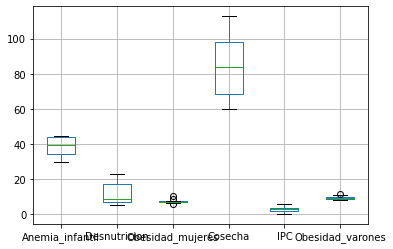

In [167]:
# Diagrama de caja y bigotes para ver si existen valores atípicos o outliers del dataset
import matplotlib.pyplot as plt
data_seguridad_alimentaria.boxplot(return_type="dict")
plt.show()

In [168]:
# Para ver si hay valores atípicos o outliers en la tabla analizada se calcula los estadísticos para el boxplot de la data analizada
data_seguridad_alimentaria.describe()

economy,Anemia_infantil,Desnutricion,Obesidad_mujeres,Cosecha,IPC,Obesidad_varones
count,19.000000,19.000000,13.000000,18.000000,19.000000,13.000000
mean,38.642105,12.105263,7.523077,83.730556,2.642989,9.569231
std,5.326070,6.435964,1.095562,16.404724,1.219057,0.952527
min,29.600000,5.400000,6.100000,59.830000,0.193135,8.200000
25%,34.150000,7.250000,7.100000,68.492500,1.878543,9.000000
50%,39.600000,8.800000,7.200000,83.765000,2.802839,9.300000
75%,43.950000,17.250000,7.700000,98.185000,3.459300,10.000000
max,44.400000,23.100000,10.400000,112.750000,5.785876,11.600000


In [169]:
# Se reemplazan los valores nulos por la mediana
reemplazar_NA = data_seguridad_alimentaria.fillna(data_seguridad_alimentaria.median(), inplace=True)
data_seguridad_alimentaria.head()

economy,Anemia_infantil,Año,Desnutricion,Obesidad_mujeres,Cosecha,IPC,Obesidad_varones
0,44.2,2001,21.5,7.2,59.83,1.977099,9.3
1,44.3,2002,22.9,7.2,63.66,0.193135,9.3
2,44.4,2003,23.1,7.2,64.86,2.259378,9.3
3,44.4,2004,21.7,7.2,63.79,3.662473,9.3
4,44.2,2005,18.8,7.1,67.14,1.616302,11.0


In [170]:
# Exportar los datos en formato csv 
data_seguridad_alimentaria.to_csv('Data_Seguridad_Alimentaria.csv', index = True)

In [171]:
# Exportar los datos en formato csv 
data1.to_csv('Data_inseguridad.csv', index = True)

In [ ]:
# Unión de la base de datos de agricultura con la variable dependiente Seguridad alimentaria

In [172]:
data_agricultura_seguridad=pd.merge(data_agricultura,data2, how='inner', on=["Año"])
data_agricultura_seguridad.head()

economy,PBI,Año,Tierras_agrícolas,Tierras_cultivables,PBI_agricultura,Empleo_total,Empleo_mujeres,Empleo_hombres,Indice_alimentos,Indice_produccion_animal,Indice_cosecha,Exportaciones,Importaciones,Desnutricion
0,1941.475342,2001,18.052344,3.343750,7.893627,34.660000,31.490000,37.090000,54.95,49.77,59.83,25.476054,13.330230,21.5
1,2021.240038,2002,17.777344,2.980469,7.523963,34.209999,31.129999,36.610001,58.35,52.53,63.66,23.319474,13.480325,22.9
2,2145.643889,2003,17.881250,2.996094,7.312919,35.980000,32.910000,38.439999,60.03,54.16,64.86,20.178655,12.586423,23.1
3,2417.034363,2004,17.895312,2.921875,6.934433,34.250000,31.990000,36.060001,59.46,55.47,63.79,19.263459,12.711126,21.7
4,2729.499172,2005,18.153125,3.070312,6.854265,34.820000,32.619999,36.599998,63.86,59.66,67.14,17.011116,11.447977,18.8


In [173]:
# Exportar los datos en formato csv 
data_agricultura_seguridad.to_csv('Data_Agricultura_seguridad.csv', index = True)

### RELACIÓN ENTRE LAS VARIABLES

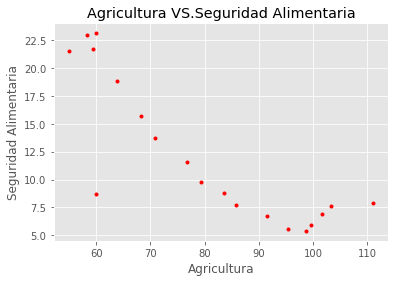

In [145]:
 # Para visualizar la relación entre la agricultura y la seguridad alimentaria e se realiza el siguiente gráfico

import matplotlib.pyplot as plt
plt.style.use('ggplot')

data_agricultura_seguridad.plot(x="Indice_alimentos", y="Desnutricion", style='.',color='red', legend=False)
plt.title("Agricultura VS.Seguridad Alimentaria")
plt.xlabel("Agricultura")
plt.ylabel("Seguridad Alimentaria")
plt.show()

<ipython-input-146-5b6e5042254c>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data_agricultura_seguridad[lista].corr(), dtype=np.bool)


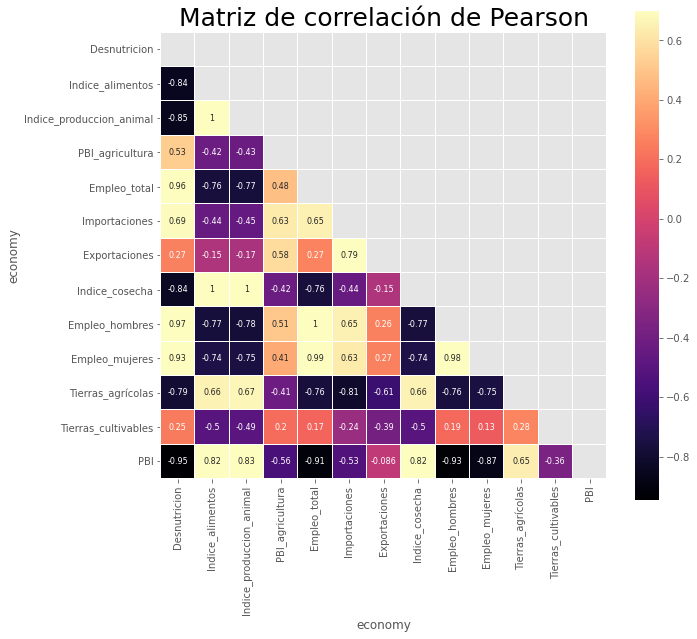

In [146]:
# Se puede hacer una Matriz de correlación de Pearson para ver mejor las relaciones entre las variables, 

import numpy as np
import seaborn as sns

lista = ["Desnutricion","Indice_alimentos","Indice_produccion_animal","PBI_agricultura","Empleo_total","Importaciones","Exportaciones","Indice_cosecha","Empleo_hombres","Empleo_mujeres","Tierras_agrícolas","Tierras_cultivables","PBI"]

# Se genera una matriz de False del tamaño de la correlación
mask = np.zeros_like(data_agricultura_seguridad[lista].corr(), dtype=np.bool) 

# Se hace True la digonal superior
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Matriz de correlación de Pearson',fontsize=25)

# Se realiza la matriz de correlación
sns.heatmap(data_agricultura_seguridad[lista].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="magma",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask, cbar_kws={"shrink": .9});

### MODELO DE REGRESIÓN LINEAL

In [ ]:
# Para crear un modelo de Regresión Lineal que mejor explique la variable Seguridad Alimentaria, 
# se realizan los siguientes pasos:

In [169]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [ ]:
# MODELO DE REGRESIÓN LINEAL MÚLTIPLE

In [179]:
# Se puede estimar de diferentes formas, en este caso se ha elegido el siguiente modelo:

# Establecer la regresión a estimar
modelo = smf.ols(formula = 'Desnutricion ~ PBI_agricultura + Empleo_total + Exportaciones + Importaciones', data= data_agricultura_seguridad)
# Resultados del ajuste 
resultados = modelo.fit()
# Imprimir el resultado
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:           Desnutricion   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     66.58
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           5.93e-09
Time:                        21:22:24   Log-Likelihood:                -33.352
No. Observations:                  19   AIC:                             76.70
Df Residuals:                      14   BIC:                             81.43
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -60.6180      8.617     

C:\Users\Perla\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [180]:
from math import sqrt
from sklearn.metrics import mean_squared_error

observaciones= data_agricultura_seguridad[["Desnutricion"]]
predicciones= resultados.predict()

print(sqrt(mean_squared_error(observaciones,predicciones)))

1.3999220685531457


### VISUALIZACIÓN DE DATOS

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl
import matplotlib.colors as mcolors
import plotly.graph_objects as go

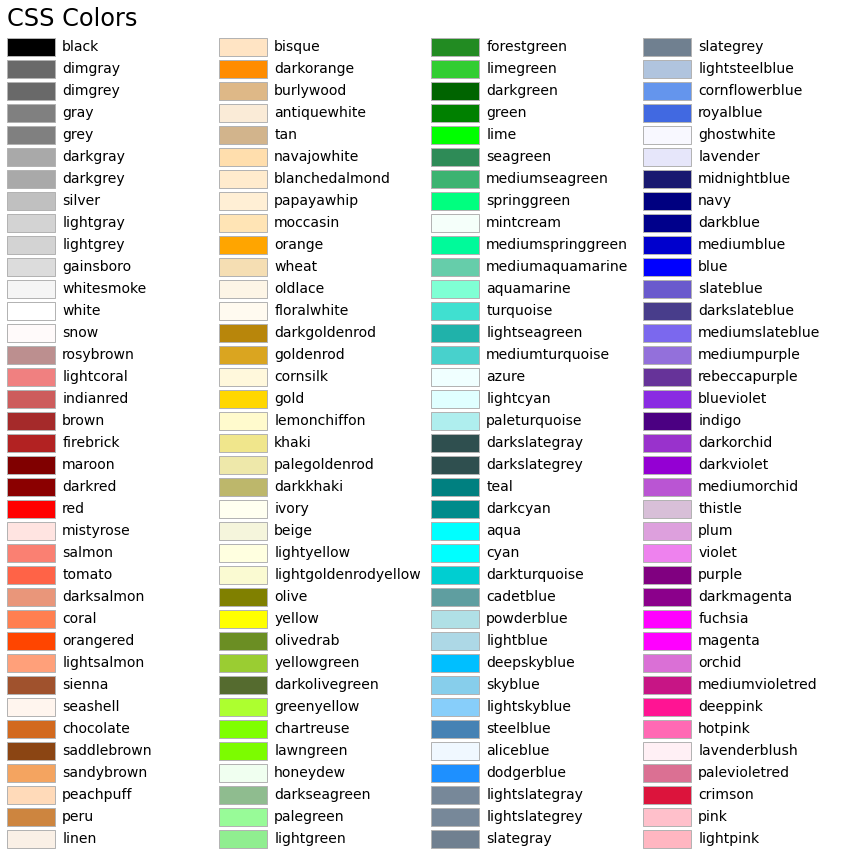

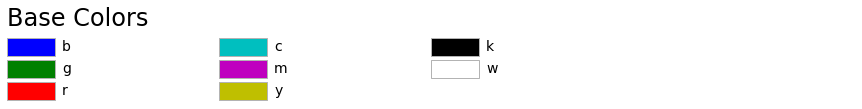

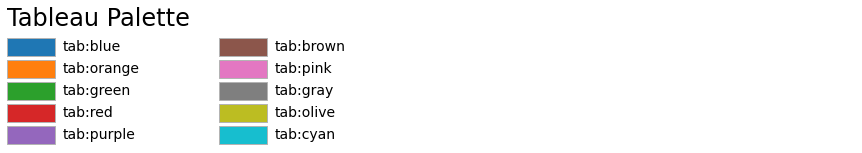

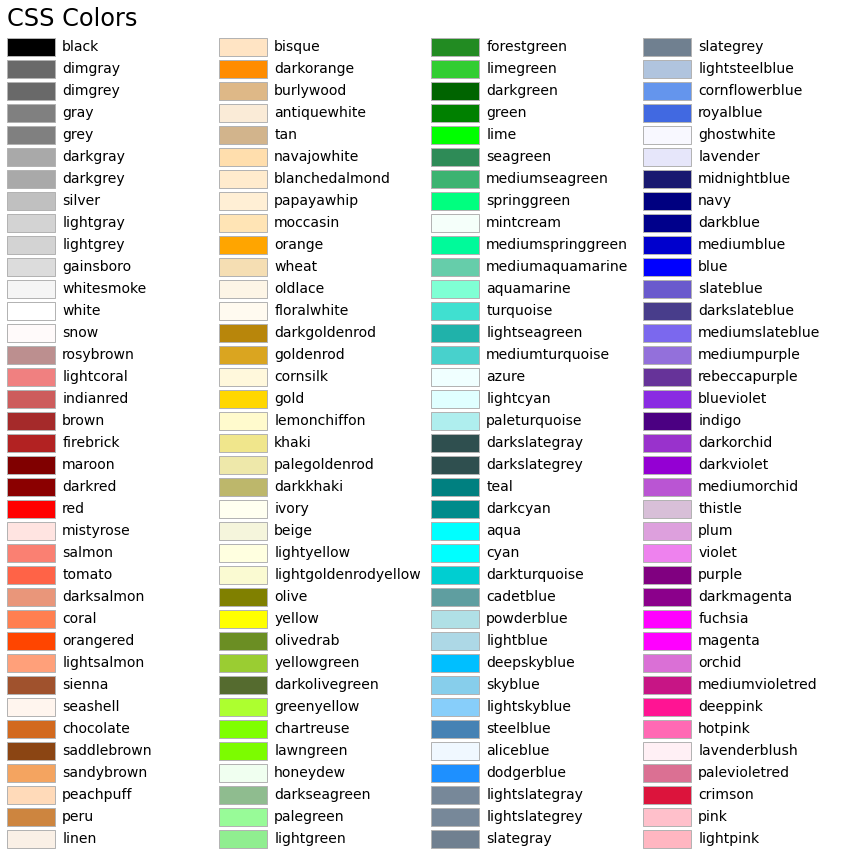

In [206]:
# Paleta de colores para matplotlib

def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

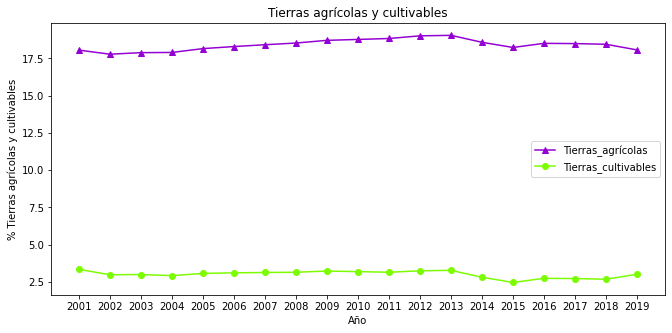

In [361]:
# Indicador: Tierras agrícolas y cultivables

plt.rcParams["figure.figsize"] = (11, 5)
fig, ax = plt.subplots()
Año = data_agricultura_seguridad['Año']
Tierras_agrícolas, =plt.plot(Año, data_agricultura_seguridad['Tierras_agrícolas'], marker = '^', color='darkviolet')
Tierras_cultivables, =plt.plot(Año, data_agricultura_seguridad['Tierras_cultivables'], marker = 'o', color='lawngreen')
plt.legend ([Tierras_agrícolas,Tierras_cultivables],  ['Tierras_agrícolas','Tierras_cultivables'])
plt.title("Tierras agrícolas y cultivables")
plt.xlabel("Año")
plt.ylabel("% Tierras agrícolas y cultivables")
plt.show()

In [333]:
# Indicador: Empleos de hombres y mujeres en la agricultura
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=data_agricultura_seguridad['Año'],
        y=data_agricultura_seguridad['Empleo_hombres'],
        name="% Empleo hombres",
        mode='lines+markers', 
        marker= dict(size=9,
                     symbol = 'diamond',
                     color ='RGB(251, 177, 36)',
                     line_width = 2
                   ),
        line = dict(color='firebrick', width=3)
    ))
fig.add_trace(
    go.Bar(
        x=data_agricultura_seguridad['Año'],
        y=data_agricultura_seguridad['Empleo_mujeres'],
        name="% Empleo mujeres",       
        text = data_agricultura_seguridad['Empleo_mujeres'],
        textposition='outside',
        textfont=dict(
        size=13,
        color='#1f77b4'),
        marker_color=data_agricultura_seguridad['PBI'],
        marker_line_color='rgb(17, 69, 126)',
        marker_line_width=2, 
        opacity=0.7
    ))

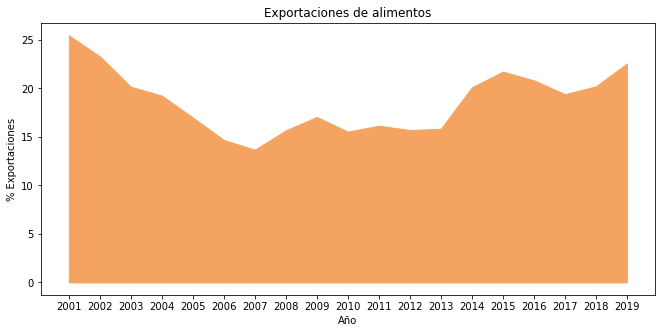

In [297]:
# Indicador: Exportaciones de alimentos
plt.rcParams["figure.figsize"] = (11, 5)
fig, ax = plt.subplots()
ax.fill_between(data_agricultura_seguridad["Año"], data_agricultura_seguridad["Exportaciones"], color='sandybrown')
plt.title("Exportaciones de alimentos")
plt.xlabel("Año")
plt.ylabel("% Exportaciones")
plt.show()

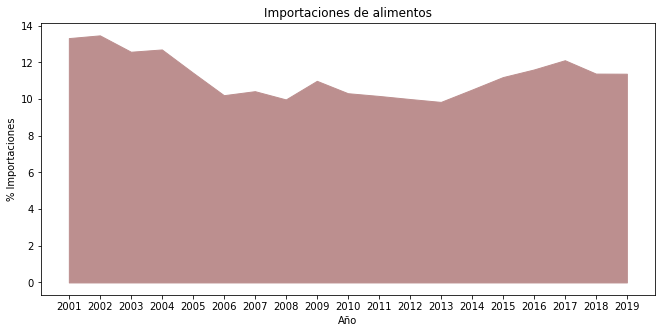

In [298]:
# Indicador: Importaciones de alimentos
plt.rcParams["figure.figsize"] = (11, 5)
fig, ax = plt.subplots()
ax.fill_between(data_agricultura_seguridad["Año"], data_agricultura_seguridad["Importaciones"], color="rosybrown")
plt.title("Importaciones de alimentos")
plt.xlabel("Año")
plt.ylabel("% Importaciones")
plt.show()

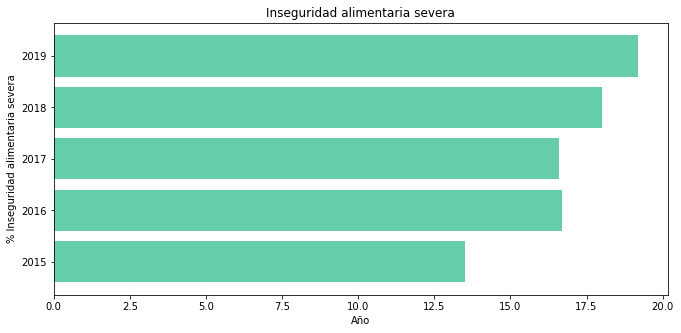

In [295]:
# Indicador: Inseguridad alimentaria
fig, ax = plt.subplots()
ax.barh(data1["Año"], data1["Inseguridad_alimentaria"], color="mediumaquamarine")
plt.title("Inseguridad alimentaria severa")
plt.xlabel("Año")
plt.ylabel("% Inseguridad alimentaria severa")
plt.show()

### Referencias:

* FAO. (2011). Una introducción a los conceptos básicos de la seguridad alimentaria. Obtenido de https://www.fao.org/3/al936s/al936s00.pdf

### Fuentes:

* https://datos.bancomundial.org/indicator?tab=all